**1. Google Play Store apps and reviews**

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed.we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play 

Let's take a look at the data, which consists of two files:

apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.

user_reviews.csv: contains 100 reviews for each app

The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity



In [3]:
from google.colab import files
uploaded = files.upload()

Saving apps.csv to apps.csv
Saving user_reviews.csv to user_reviews.csv


In [4]:
# Read in dataset
import io
import pandas as pd
apps_with_duplicates = pd.read_csv(io.BytesIO(uploaded['apps.csv']))
# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ',len(apps) )

# Have a look at a random sample of 5 rows
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8981,10142,Ez Texting,BUSINESS,3.3,49,0.051,"10,000+",Free,0,Everyone,Business,"January 18, 2012",0.59,2.1 and up
4482,5444,Weaphones™ Gun Sim Free Vol 1,FAMILY,4.3,598975,39M,"10,000,000+",Free,0,Everyone,Simulation,"January 17, 2018",2.4.0,4.0 and up
8074,9194,UP EB Bill Payment & Details,SOCIAL,5.0,3,2.4M,50+,Free,0,Teen,Social,"July 11, 2018",2.0,4.0 and up
7881,9000,Downvids Helper - One touch DW,VIDEO_PLAYERS,3.5,197,9.8M,"10,000+",Free,0,Everyone,Video Players & Editors,"February 5, 2017",1.0,4.0.3 and up
6756,7815,Combat Strike CS 🔫 Counter Terrorist Attack FPS💣,GAME,4.1,1019,39M,"100,000+",Free,0,Teen,Action,"July 23, 2018",1.0.7,4.1 and up


**2.** **Data cleaning**

The three features are Installs, Size, and Price. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult.

In [0]:
# List of characters to remove
chars_to_remove = ['+',",","M","$"]
# List of column names to clean
cols_to_clean = ["Installs","Size","Price"]

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col]) 

In [6]:
! pip install chart_studio

In [7]:
! pip install plotly==4.7.1

**3. Exploring app categories**

In [0]:
import chart_studio
chart_studio.tools.set_credentials_file(username='AishwaryaManjunath1308', api_key='6EqRpCBkQWk74WqOfZLH')



In [23]:
import chart_studio.plotly as py
import plotly.graph_objects as go

num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

py.plot(data,auto_open=True)

Number of categories =  33


'https://plotly.com/~AishwaryaManjunath1308/1/'

**4.Average volume of ratings across all app categories**

In [26]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

py.plot(data,layout,auto_open=True)

Average app rating =  4.173243045387998


'https://plotly.com/~AishwaryaManjunath1308/3/'

**5. Size and price of an app**

We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under \$10.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



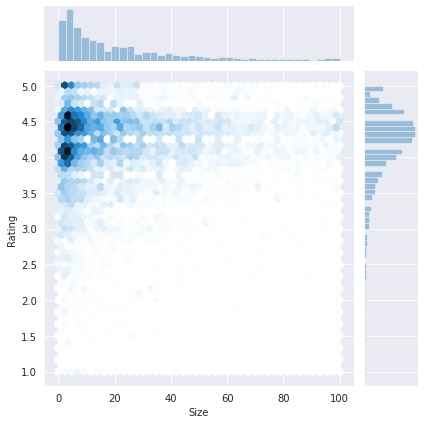

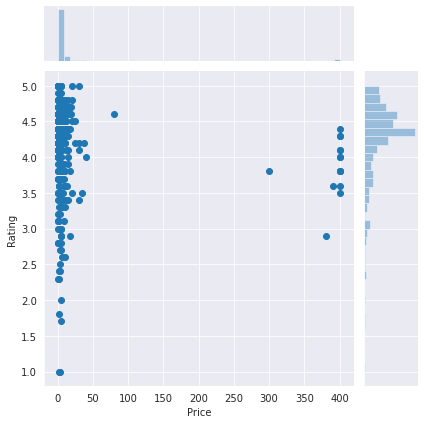

In [27]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Plot size vs. rating
plt1 = sns.jointplot(x = apps['Size'], y = apps['Rating'], kind = 'hex')

# Subset out apps whose type is 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

**6. Relation between app category and app price**

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


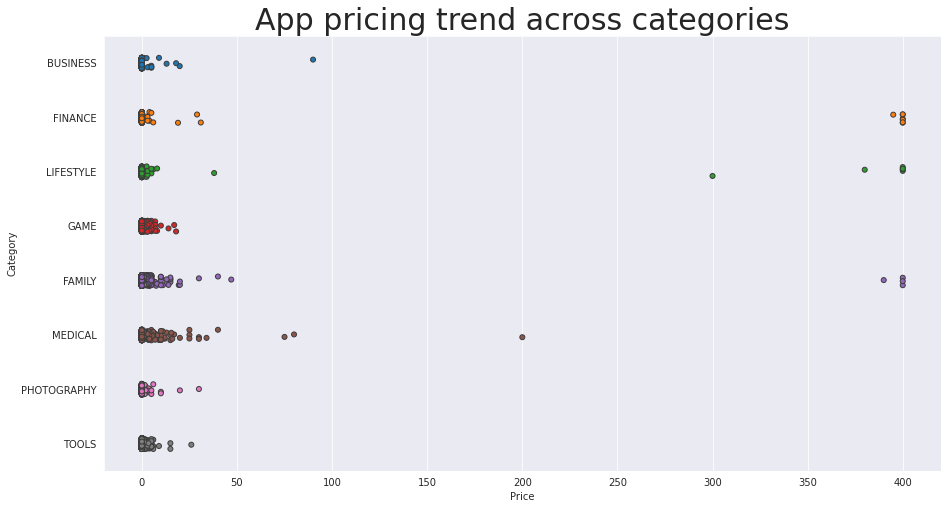

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories',size=30)

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

**7. Filter out "junk" apps**

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

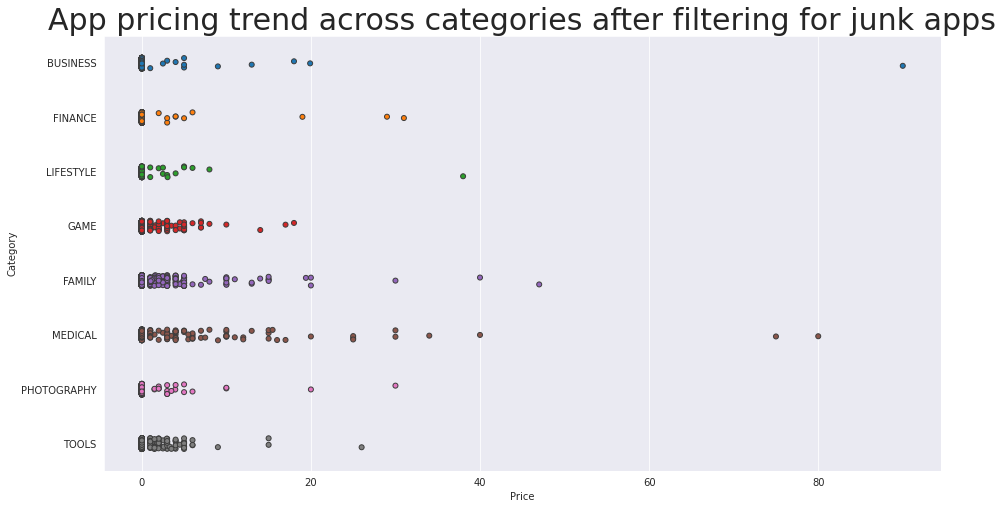

In [29]:
# Select apps priced below 100
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x=apps_under_100['Price'], y=apps_under_100['Category'], data=None,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps',size=30)

**8. Popularity of paid apps vs free apps**

In [31]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
py.plot(data,layout,auto_open=True)

'https://plotly.com/~AishwaryaManjunath1308/7/'

**9. Simple Sentiment analysis of user reviews**

Based on the positive and negative words used by the reviewers.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

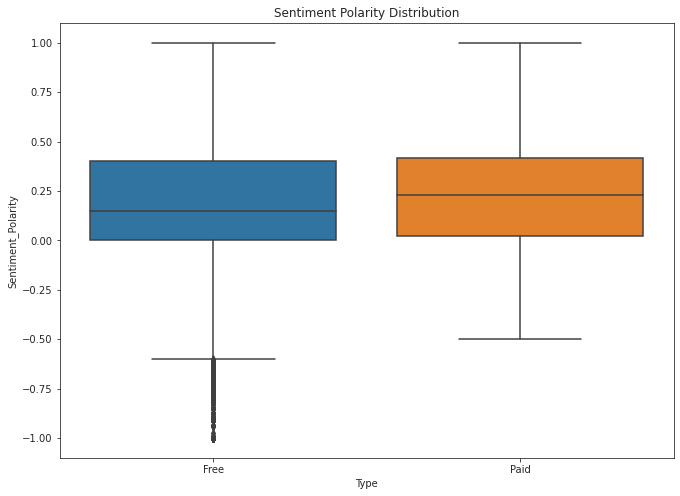

In [32]:
# Load user_reviews.csv
reviews_df = pd.read_csv(io.BytesIO(uploaded['user_reviews.csv']))

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on = "App", how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x =merged_df['Type'], y =merged_df['Sentiment_Polarity'], data = None)
ax.set_title('Sentiment Polarity Distribution')